# Popular Data Science Questions

The objective of this project is to use Data Science Stack Exchange to determine what content should a data science education company create, based on interest by subject.

Here's a link to query and explore Data Science Stack Exchange's database:https://data.stackexchange.com/datascience/query/new

To get the relevant data we run the following query.

SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;


In [31]:
import pandas as pd
quest19 = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])

In [32]:
quest19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [33]:
quest19.sample(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
7147,53885,2019-06-16 05:28:29,0,15,<encoding><binary>,0,NaN
7946,44072,2019-01-16 06:12:30,0,201,<visualization><data><correlation><probability>,2,NaN
2294,58415,2019-08-30 10:17:39,1,329,<neural-network><pytorch>,1,NaN
1506,45965,2019-02-21 15:24:11,1,36,<machine-learning><python><neural-network>,0,NaN
4679,51214,2019-05-01 10:13:13,2,73,<machine-learning><classification><machine-lea...,1,NaN
4648,62006,2019-10-20 20:17:20,1,18,<machine-learning><keras><scikit-learn>,0,NaN
7705,54181,2019-06-21 00:01:08,1,22,<bigdata><apache-spark><scala>,0,NaN
3818,49297,2019-04-15 02:36:29,1,154,<machine-learning><xgboost><kaggle><grid-searc...,1,NaN
5638,52287,2019-05-20 22:58:43,0,49,<machine-learning><r><regression><predictive-m...,0,NaN
1848,46646,2019-03-04 15:09:30,3,245,<r><cross-validation><unbalanced-classes><over...,1,1.0


-----------
Cleaning Data
--------

replacing missing values in FavoriteCount by 0:

In [34]:
quest19['FavoriteCount'].fillna(0, inplace=True)

Changing FavoriteCount type to integer:

In [35]:
quest19['FavoriteCount'] = quest19['FavoriteCount'].astype(int)

In [36]:
quest19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [37]:
quest19.describe()

,Id,Score,ViewCount,AnswerCount,FavoriteCount
count,8839.000000,8839.000000,8839.000000,8839.000000,8839.000000
mean,54724.172870,0.870687,171.548026,0.787985,0.188596
std,6507.618509,1.410255,772.813626,0.851146,0.584422
min,43363.000000,-2.000000,2.000000,0.000000,0.000000
25%,48917.500000,0.000000,22.000000,0.000000,0.000000
50%,54833.000000,1.000000,40.000000,1.000000,0.000000
75%,60674.500000,1.000000,98.000000,1.000000,0.000000
max,65675.000000,45.000000,33203.000000,9.000000,16.000000


Creating a list for all the tags in Tags:

In [38]:
quest19['Tags'] = quest19['Tags'].str[1:-1].str.split('><')

In [39]:
quest19['Tags'].sample(10)

5794                            [clustering, terminology]
6521                              [classification, tfidf]
7233    [machine-learning, deep-learning, data-science...
3489                             [machine-learning, k-nn]
3469                                             [python]
3160                       [scikit-learn, decision-trees]
1219    [python, visualization, correlation, matplotli...
3669                                        [correlation]
194                    [deep-learning, keras, tensorflow]
6084    [classification, multiclass-classification, ev...
Name: Tags, dtype: object

---------
Most Used and Most Viewed Tags
----------

In [55]:
tags_used = {}
for i in quest19['Tags']:
    for j in i:
        if j in tags_used:
            tags_used[j] += 1
        else:
            tags_used[j] = 1


In [56]:
serie_tags_used = pd.DataFrame.from_dict(tags_used, orient='index')
serie_tags_used.rename(columns={0:'used'}, inplace=True)
 

In [57]:
top10_used = serie_tags_used['used'].sort_values(ascending=False)\
.head(10)

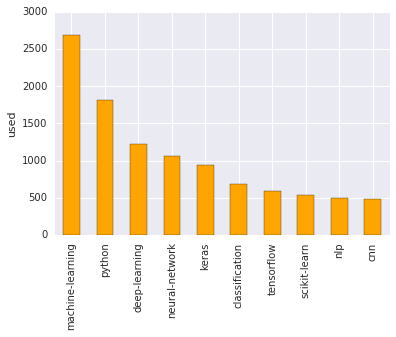

In [143]:
%matplotlib inline
ax = top10_used.plot('bar', color='orange')
ax.set_ylabel('used')

Machien-learning, python and deep learning are the 3 most used tags

In [59]:
tags_viewed = {}
index = quest19.index.tolist()
for i in index:
    for j in quest19.loc[i,'Tags']:
        if j in tags_viewed:
            tags_viewed[j] += quest19.loc[i,'ViewCount']
        else:
            tags_viewed[j] = quest19.loc[i,'ViewCount']


In [61]:
serie_tags_viewed = pd.DataFrame.from_dict(tags_viewed, orient='index')
serie_tags_viewed.rename(columns={0:'viewed'}, inplace=True)
 

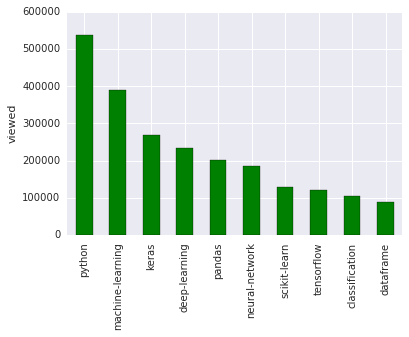

In [141]:
top10_viewed = serie_tags_viewed['viewed'].sort_values(ascending=False)\
.head(10)
ax = top10_viewed.plot('bar', color='green')
ax.set_ylabel('viewed')

Python machine-learning and keras are the 3 most viewed tags

--------
Relations Between Tags
------------

In [74]:
set1 = set(top10_viewed.index.tolist())
set2 = set(top10_used.index.tolist())

In [75]:
top10_used_viewed = top10_used.index.tolist() + list(set1-set2)

In [77]:
top10_used_viewed

['machine-learning',
 'python',
 'deep-learning',
 'neural-network',
 'keras',
 'classification',
 'tensorflow',
 'scikit-learn',
 'nlp',
 'cnn',
 'pandas',
 'dataframe']

In [95]:
correlation = pd.DataFrame(columns=serie_tags_viewed.index,\
                           index=serie_tags_viewed.index)

In [98]:
correlation.fillna(0, inplace=True)
for i in quest19['Tags']:
    correlation.loc[i,i] += 1

In [100]:
correlation_top10 = correlation.loc[top10_used_viewed, top10_used_viewed]

In [103]:
for i in top10_used_viewed:
    correlation_top10.loc[i,i] = 0

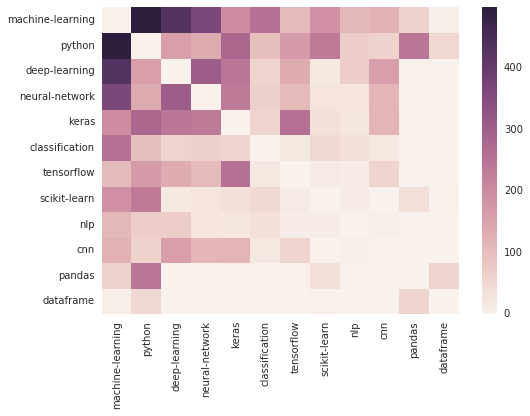

In [104]:
import seaborn as sns
sns.heatmap(correlation_top10)

It seems that most of the top tags are related with machine learning and specifically deep learning!

-------
Trend in Deep Learning
---------------

Could interest in deep learning be slowing down? 
The file all_questions.csv holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;

In this we will track the interest in deep learning across time. We will:

Count how many deep learning questions are asked per time period, 
the total amount of questions per time period and how many deep learning questions there are relative to the total amount of questions per time period.

In [106]:
questDL = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

In [107]:
questDL.sample(10)

,Id,CreationDate,Tags
6633,58296,2019-08-28 02:19:00,<machine-learning><recommender-system>
4475,38977,2018-09-30 18:23:21,<python><r><xgboost><boosting>
1355,25015,2017-11-22 15:48:04,<nlp>
16617,32009,2018-05-23 03:46:16,<machine-learning><classification><categorical...
16132,11261,2016-04-17 19:07:56,<linear-regression>
2308,903,2014-08-04 22:27:10,<dataset><statistics><ab-test>
21162,66468,2020-01-14 15:27:08,<dataset><feature-selection>
19888,65372,2019-12-24 11:18:34,<machine-learning><natural-language-process>
20084,34038,2018-07-05 13:13:41,<python><classification><scikit-learn><random-...
13230,62047,2019-10-21 17:25:46,<classification><class-imbalance>


In [108]:
questDL['Tags'] = questDL['Tags'].str[1:-1].str.split('><')

In [109]:
questDL['Tags'].sample(10)

11967    [python, classification, optimization, data-sc...
6872                               [machine-learning, svm]
1599                                              [career]
18852                           [word-embeddings, pytorch]
20104           [machine-learning, python, classification]
4130                                      [python, r, nlp]
4580                            [data, sentiment-analysis]
2253     [machine-learning, neural-network, cnn, convol...
11362    [machine-learning, neural-network, deep-learni...
18872    [deep-learning, classification, image-classifi...
Name: Tags, dtype: object

In [117]:
dl_tags = ["lstm", "cnn", "scikit-learn", "tensorflow", \
           "keras", "neural-network", "deep-learning"]
def dl_func(element):
    for i in element:
        if i in dl_tags:
            return 1
    return 0

questDL['DL'] = questDL['Tags'].apply(dl_func)

In [122]:
questDL['Year'] = questDL['CreationDate'].apply(lambda x:x.year)
questDL.sample(10)

,Id,CreationDate,Tags,DL,Year
8714,41246,2018-11-15 03:38:17,"[machine-learning, python, deep-learning, mach...",1,2018
11500,61362,2019-10-07 06:29:26,"[ensemble-modeling, ensemble-learning]",0,2019
2319,937,2014-08-07 15:33:43,"[feature-selection, scikit-learn]",1,2014
7132,17956,2017-03-21 04:14:25,[keras],1,2017
8351,49141,2019-04-11 17:33:15,"[machine-learning, tensorflow, object-detectio...",1,2019
12661,61833,2019-10-16 17:40:33,"[data, bigdata]",0,2019
710,55699,2019-07-15 14:19:18,"[machine-learning, python, regression, feature...",0,2019
15247,10884,2016-03-25 05:44:52,"[machine-learning, programming]",0,2016
18838,12797,2016-07-15 10:43:58,"[predictive-modeling, scikit-learn, categorica...",1,2016
19161,54891,2019-07-02 07:25:03,"[machine-learning, python, nlp, data-cleaning]",0,2019


In [132]:
sumDL = questDL.groupby('Year')['DL'].sum().to_frame()

In [134]:
sumDL['total'] = questDL.groupby('Year')['DL'].count()

In [136]:
sumDL['ratio'] = sumDL['DL'] / sumDL['total'] * 100

In [137]:
sumDL

,DL,total,ratio
Year,,,
2014,43,562,7.651246
2015,157,1167,13.453299
2016,557,2146,25.955266
2017,1068,2957,36.117687
2018,2336,5475,42.666667
2019,3489,8810,39.602724
2020,168,459,36.601307


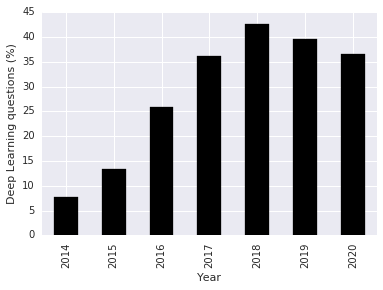

In [147]:
ax = sumDL['ratio'].plot('bar', color='black')
ax.set_ylabel('Deep Learning questions (%)')

Ratio of questions about Deep-Learning peaked in 2018 and is slightly reducing after but it is still a high percentage of total questions (>35%)